In [1]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 12.5MB/s]


In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv('/content/ads.csv')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Checking shape of the dataset

rows, columns = df.shape
print(f'There are {rows} rows and {columns} in above dataset.')


There are 200 rows and 5 in above dataset.


In [7]:
df.drop(columns = ['Unnamed: 0'], inplace = True )

In [8]:
# Checking correlation
df.corr().style.background_gradient(cmap = 'YlGnBu')

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

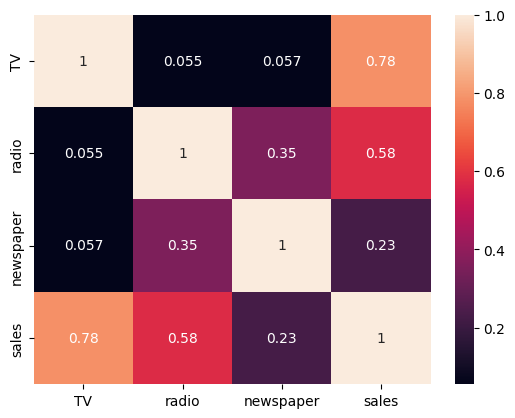

In [9]:
sns.heatmap(df.corr(), annot= True)

# Checking for null values


In [10]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Feature Selection and Feature engineering

In [11]:
# Linear Regression

from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [12]:
X_train.shape, X_test.shape

((160, 3), (40, 3))

In [13]:
y_train.shape, y_test.shape

((160,), (40,))

# Fitting model using Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
model.score(X_test, y_test)

0.9085774752313167

# Evaluation of above model

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(y_true = y_test, y_pred = y_pred)
MEA = mean_absolute_error(y_true = y_test, y_pred = y_pred)
R2 = r2_score(y_test, y_pred)

In [18]:
print(f'Here mean squared error is {MSE} and mean absolute error is {MEA}')
print(f'R2 score is {R2}')

Here mean squared error is 2.2171510725418964 and mean absolute error is 1.2114892606469105
R2 score is 0.9085774752313167
